In [3]:
from __future__ import division, print_function
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras.layers import Dense,BatchNormalization
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
import os
import matplotlib.pyplot as plt

In [19]:
data = np.load('/home/chase/Boyka/Lyu/fac_cond256_unit8.npz')
raw_X=data['cond']
raw_X=np.squeeze(raw_X)
raw_X[0]
x_min=np.min(raw_X)
x_max=np.max(raw_X)
raw_Y=data['fac']
raw_Y=raw_Y.astype(np.float64)
y_min=[np.min(raw_Y[:,0]),np.min(raw_Y[:,1]),np.min(raw_Y[:,2])]
y_max=[np.max(raw_Y[:,0]),np.max(raw_Y[:,1]),np.max(raw_Y[:,2])]
print(raw_Y[:,1])
# raw_X=(raw_X[:,0]-x_min)/(x_max-x_min)
raw_Y[:,0]=(raw_Y[:,0]-y_min[0])/(y_max[0]-y_min[0])
raw_Y[:,1]=(raw_Y[:,1]-y_min[1])/(y_max[1]-y_min[1])
raw_Y[:,2]=(raw_Y[:,2]-y_min[2])/(y_max[2]-y_min[2])
BATCH_SIZE = 256   
NUM_EPOCHS = 10000
Xtrain=raw_X[:-1000]
Ytrain=raw_Y[:-1000]
Xtest=raw_X[-1000:]
Ytest=raw_Y[-1000:]


[0.795865 0.84173  0.787595 ... 0.75331  0.799175 0.84504 ]


In [20]:
raw_Y[:,0]

array([0.1312632 , 0.26287083, 0.39447847, ..., 0.35013042, 0.4817383 ,
       0.61334594])

In [21]:
model=load_model('data_norm_10000ep.h5')

In [22]:
pre = model.predict(Xtest, batch_size=BATCH_SIZE)

In [23]:
pre

array([[0.342084  , 0.74959147, 0.26588503],
       [0.5847478 , 0.18177202, 0.1737025 ],
       [0.5510713 , 0.6839167 , 0.5860612 ],
       ...,
       [0.53294295, 0.07256849, 0.17115046],
       [0.5796801 , 0.47795165, 0.1719155 ],
       [0.7282367 , 0.87015486, 0.75300914]], dtype=float32)

In [24]:
pre[:,0]=pre[:,0]*(y_max[0]-y_min[0])+y_min[0]
pre[:,1]=pre[:,1]*(y_max[1]-y_min[1])+y_min[1]
pre[:,2]=pre[:,2]*(y_max[2]-y_min[2])+y_min[2]

In [35]:
np.max(pre[:,0])

5.858661

In [26]:
y_min[0],y_min[1],y_min[2],y_max[0],y_max[1],y_max[2]

(1.001377, 0.750035, 6e-06)

In [37]:
origin_Y = np.load('/home/chase/Boyka/Lyu/fac_cond256_unit8.npz')['fac'].astype(np.float64)
origin_Y_test=origin_Y[-1000:]
print(origin_Y_test)
print(pre)

[[1.828456 0.825891 0.00412 ]
 [2.354607 0.771756 0.010689]
 [2.880759 0.817621 0.017258]
 ...
 [2.401155 0.75331  0.013189]
 [2.927307 0.799175 0.019758]
 [3.453458 0.84504  0.026327]]
[[2.3689864  0.8249589  0.00797909]
 [3.339126   0.7682037  0.00521482]
 [3.2044916  0.81839454 0.01758022]
 ...
 [3.1320167  0.75728846 0.00513829]
 [3.3188663  0.7978077  0.00516123]
 [3.912777   0.83700955 0.02258649]]


In [32]:
ae=np.maximum(pre-origin_Y_test,origin_Y_test-pre)
print(ae)
mae0=np.mean(ae[:,0])
mae1=np.mean(ae[:,1])
mae2=np.mean(ae[:,2])
mse0 = math.sqrt(mae0)
mse1 = math.sqrt(mae1)
mse2 = math.sqrt(mae2)
print("\nMAE0: {:.3f}, MAE1: {:.3f}, MAE2: {:.3f},".format(mae0, mae1,mae2))
print("\nMSE0: {:.3f}, MSE1: {:.3f}, MSE2: {:.3f},".format(mse0, mse1,mse2))

[[5.40530368e-01 9.32079521e-04 3.85909405e-03]
 [9.84519110e-01 3.55232425e-03 5.47418311e-03]
 [3.23732615e-01 7.73541740e-04 3.22216751e-04]
 ...
 [7.30861659e-01 3.97845596e-03 8.05071128e-03]
 [3.91559253e-01 1.36730652e-03 1.45967700e-02]
 [4.59318947e-01 8.03045086e-03 3.74051463e-03]]

MAE0: 0.881, MAE1: 0.003, MAE2: 0.005,

MSE0: 0.938, MSE1: 0.058, MSE2: 0.073,


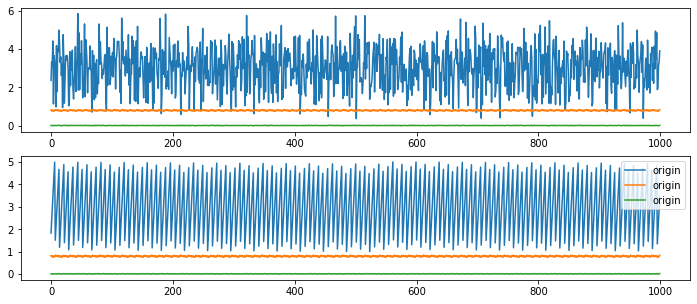

In [33]:
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.plot(pre,label='predctions')
plt.subplot(212)
plt.plot(origin_Y_test,label='origin')
plt.legend()
plt.show()

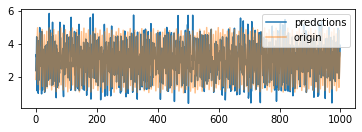

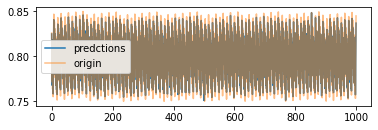

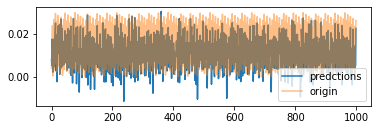

In [34]:
plt.figure(1)
plt.subplot(211)
plt.plot(pre[:,0],label='predctions',alpha=1)
plt.plot(origin_Y_test[:,0],label='origin',alpha=0.5)
plt.legend(['predctions','origin'])

plt.figure(2)
plt.subplot(211)
plt.plot(pre[:,1],label='predctions',alpha=1)
plt.plot(origin_Y_test[:,1],label='origin',alpha=0.5)
plt.legend()

plt.figure(3)
plt.subplot(211)
plt.plot(pre[:,2],label='predctions',alpha=1)
plt.plot(origin_Y_test[:,2],label='origin',alpha=0.5)
plt.legend()
plt.show()